In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
data = pd.read_csv('day_2021_to_2024.csv')

In [21]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2021-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2021-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2021-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2021-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2021-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [22]:
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,151.950000,2.206000,1.500000,5.514000,0.026000,3.006000,0.684000,1.436000,0.447693,0.432062,0.633361,0.199282,609.764000,2493.484000,3103.248000
std,105.483225,1.093692,1.118314,3.453081,0.159175,2.007979,0.465029,0.567508,0.188111,0.168734,0.155079,0.078765,535.335697,1080.505563,1410.105795
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,9.000000,416.000000,431.000000
25%,63.000000,1.000000,0.750000,3.000000,0.000000,1.000000,0.000000,1.000000,0.292418,0.289191,0.516667,0.141794,178.750000,1550.250000,1810.750000
50%,125.500000,2.000000,1.500000,5.000000,0.000000,3.000000,1.000000,1.000000,0.429384,0.425806,0.634167,0.194017,521.000000,2481.500000,3221.500000
75%,240.250000,3.000000,2.250000,8.000000,0.000000,5.000000,1.000000,2.000000,0.616667,0.574500,0.739583,0.245425,818.750000,3474.750000,4392.500000
max,365.000000,4.000000,3.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.849167,0.840896,0.972500,0.507463,3065.000000,4614.000000,6043.000000


## Data Visualization 
## Visualizing trends over time using a line plot, Barplot,Scatterplot, heatmap to better understand patterns in bike rentals.

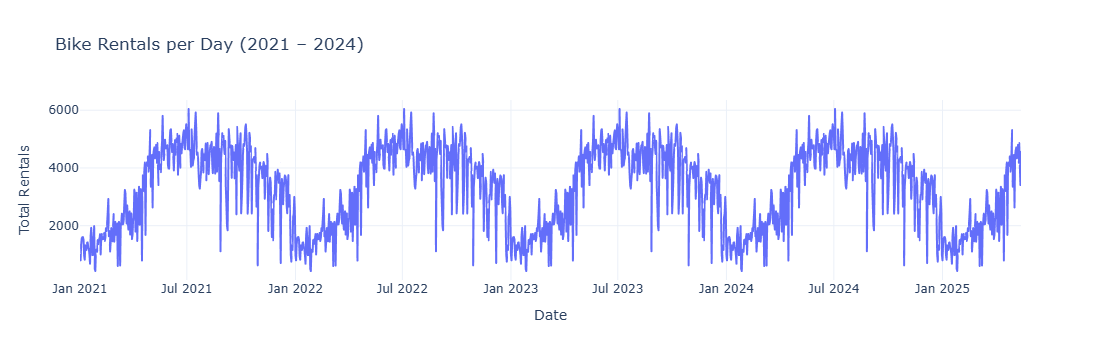

In [23]:

data["dteday"] = pd.to_datetime(data["dteday"])
data = data.sort_values("dteday")
fig = px.line(
    data,
    x="dteday",
    y="cnt",
    title="Bike Rentals per Day (2021 – 2024)",
    labels={"dteday": "Date", "cnt": "Total Rentals"},
    template="plotly_white"
)
fig.show()

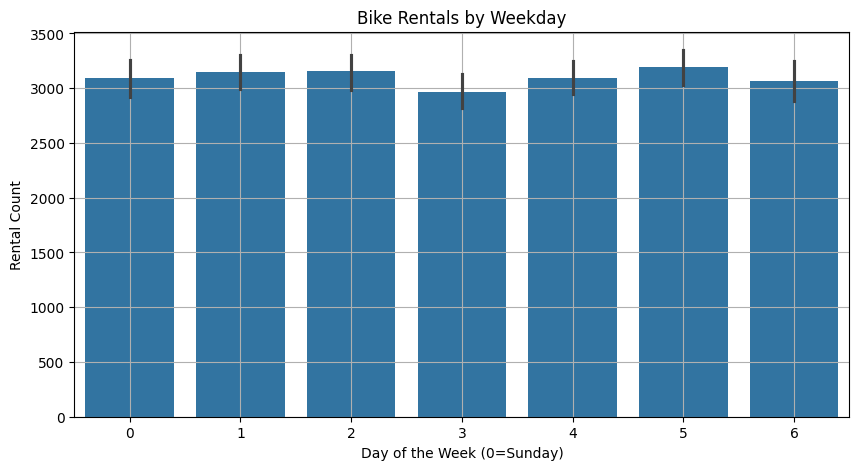

In [24]:
#Bar chart
plt.figure(figsize=(10, 5))
sns.barplot(data=data, x='weekday', y='cnt')
plt.title('Bike Rentals by Weekday')
plt.xlabel('Day of the Week (0=Sunday)')
plt.ylabel('Rental Count')
plt.grid(True)
plt.show()


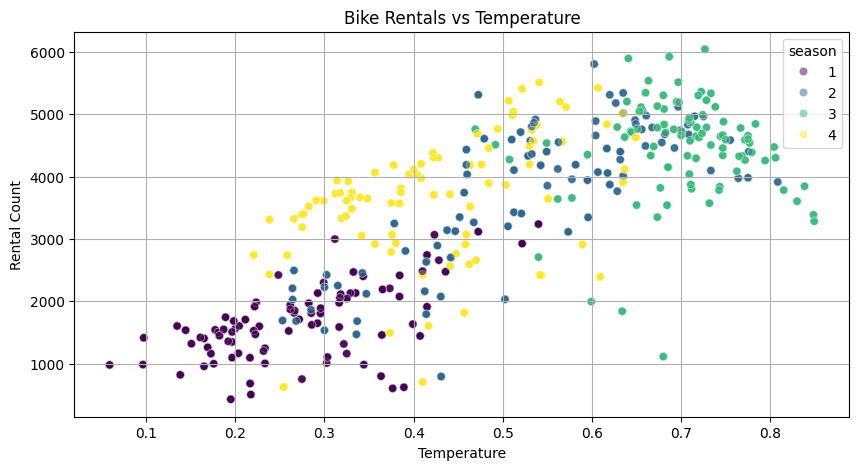

In [25]:
#(scatterplot)
#Relationship Between Temperature and Rentals
plt.figure(figsize=(10, 5))
sns.scatterplot(x='temp', y='cnt', data=data, alpha=0.5,  hue='season',
                palette='viridis')
plt.title('Bike Rentals vs Temperature')
plt.xlabel('Temperature')
plt.ylabel('Rental Count')
plt.grid(True)
plt.show()

Analysis: The scatterplot shows a clear positive relationship between temperature and rental counts.
As temperatures rise, the number of bike rentals tends to increase, especially between 15°C and 30°C.
There is also a higher density of rentals in moderate temperature ranges, suggesting people prefer to rent bikes during comfortable weather.

Correlation Heatmap:
Plotting a heatmap to observe the correlation between numerical variables

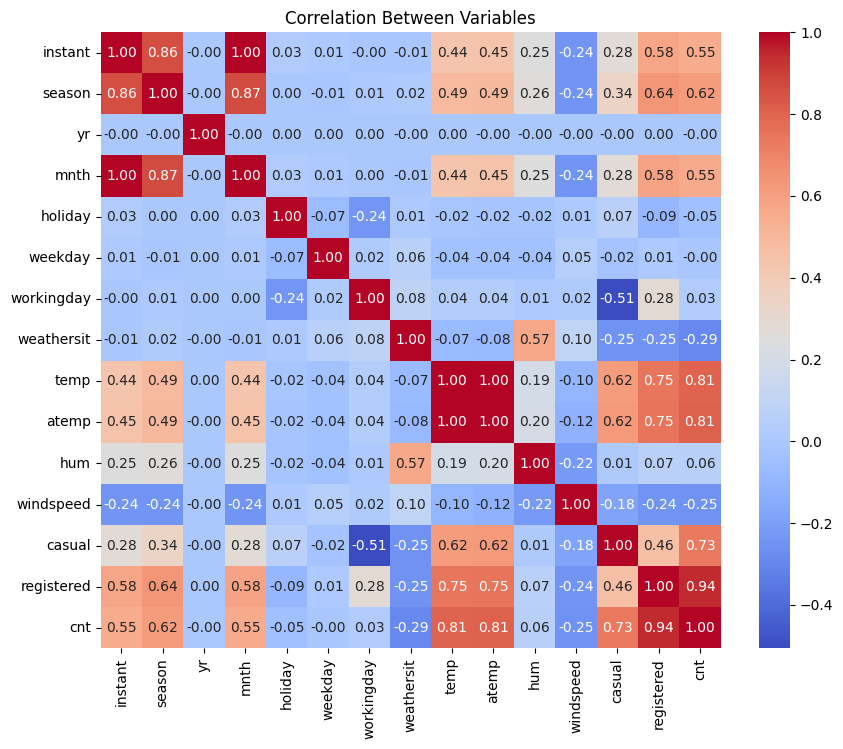

In [26]:
#heatmap to better understand patterns in bike rentals
numeric_df= data.select_dtypes(include='number')
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between Variables')
plt.show()

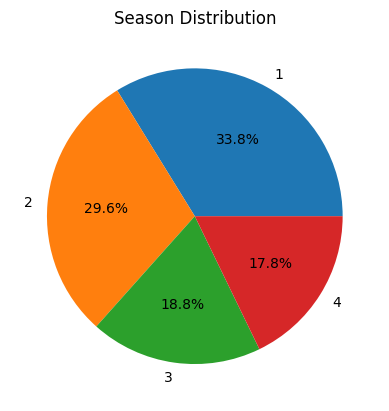

In [27]:
#sample piechart program
# Count values in 'season' column
counts = df['season'].value_counts()

# Plot pie chart
plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
plt.title("Season Distribution")
plt.show()

#Feature Scaling-->Feature scaling is a techinque which is helps us to standardize the independent features in fixed range.

In [28]:
#Feature Scaling-->minimum-maximum
from sklearn.preprocessing import MinMaxScaler, StandardScaler


# List of numeric features to scale (excluding target 'cnt' and 'instant', 'dteday' if present)
features_to_scale = ['temp', 'atemp', 'hum', 'windspeed']

# Optionally drop non-numeric/date columns
df_scaled = df.copy()

#Min-Max Scaling
minmax_scaler = MinMaxScaler()
df_minmax_scaled = df_scaled.copy()
df_minmax_scaled[features_to_scale] = minmax_scaler.fit_transform(df_minmax_scaled[features_to_scale])

print(" Min-Max Scaled Features:")
print(df_minmax_scaled[features_to_scale].head())



 Min-Max Scaled Features:
       temp     atemp       hum  windspeed
0  0.360789  0.373517  0.828620   0.284606
1  0.385232  0.360541  0.715771   0.466215
2  0.173705  0.144830  0.449638   0.465740
3  0.178308  0.174649  0.607131   0.284297
4  0.212429  0.197158  0.449313   0.339143


In [29]:
#Feature scaling --> Standard Scaling
standard_scaler = StandardScaler()
df_standard_scaled = df_scaled.copy()
df_standard_scaled[features_to_scale] = standard_scaler.fit_transform(df_standard_scaled[features_to_scale])

print("\n Standard Scaled Features:")
print(df_standard_scaled[features_to_scale].head())


 Standard Scaled Features:
       temp     atemp       hum  windspeed
0 -0.550487 -0.405694  1.112431  -0.493180
1 -0.447803 -0.464298  0.404577   0.625528
2 -1.336407 -1.438464 -1.264756   0.622607
3 -1.317074 -1.303798 -0.276872  -0.495085
4 -1.173734 -1.202146 -1.266795  -0.157236


Check with model parameters if needed go for hyperparameter tuning(Cross validation)

In [30]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

# Drop non-essential columns
data = data.drop(['instant', 'dteday', 'casual', 'registered'], axis=1)

# Define features and target
X = data.drop('cnt', axis=1)
y = data['cnt']

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initial model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Initial evaluation
print("Initial Model Performance:")
print("R² Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
# Calculate RMSE by taking the square root of MSE
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

# Hyperparameter tuning with GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid,
                           cv=3, scoring='r2', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Best model evaluation
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

print("\n Tuned Model Performance:")
print("Best Parameters:", grid_search.best_params_)
print("R² Score:", r2_score(y_test, y_pred_best))
print("MAE:", mean_absolute_error(y_test, y_pred_best))
# Calculate RMSE by taking the square root of MSE
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_best)))

Initial Model Performance:
R² Score: 0.9981014467218436
MAE: 23.157849999999993
RMSE: 60.26117780130089
Fitting 3 folds for each of 18 candidates, totalling 54 fits

 Tuned Model Performance:
Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 150}
R² Score: 0.9979564339485837
MAE: 23.272600000000008
RMSE: 62.520229110264786


Evalution of the metrics

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from math import sqrt

# Load dataset
data = pd.read_csv("day_2021_to_2024.csv")

# Drop unnecessary columns
data = data.drop(['instant', 'dteday', 'casual', 'registered'], axis=1)

# Define features and target
X = data.drop('cnt', axis=1)
y = data['cnt']

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train Random Forest model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = sqrt(mean_squared_error(y_test, y_pred))

# Print metrics
print("Model Evaluation Metrics:")
print("R² Score :", round(r2, 4))
print("MAE      :", round(mae, 2))
print("RMSE     :", round(rmse, 2))

Model Evaluation Metrics:
R² Score : 0.9978
MAE      : 26.1
RMSE     : 64.13


#Polynomial Regression --> we transfer our data into a polynomial using the polynomial features function from scikit-learn library
# We Use linear regression to fit the parameter

In [33]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Drop unnecessary columns
df = df.drop(['instant', 'dteday', 'casual', 'registered'], axis=1)

# Features and target
X = df.drop('cnt', axis=1)
y = df['cnt']

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Polynomial transformation
poly = PolynomialFeatures(degree=2)  # You can change degree
X_poly = poly.fit_transform(X_scaled)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Fit polynomial regression
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluation
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = sqrt(mean_squared_error(y_test, y_pred))

# Results
print("Polynomial Regression Evaluation:")
print(f"R² Score: {r2:.4f}")
print(f"MAE     : {mae:.2f}")
print(f"RMSE    : {rmse:.2f}")

Polynomial Regression Evaluation:
R² Score: 0.8882
MAE     : 357.47
RMSE    : 459.49


#Let us implement / understand polynomial regression from scratch,let us genarate some non-linear data

X shape: (100, 1)


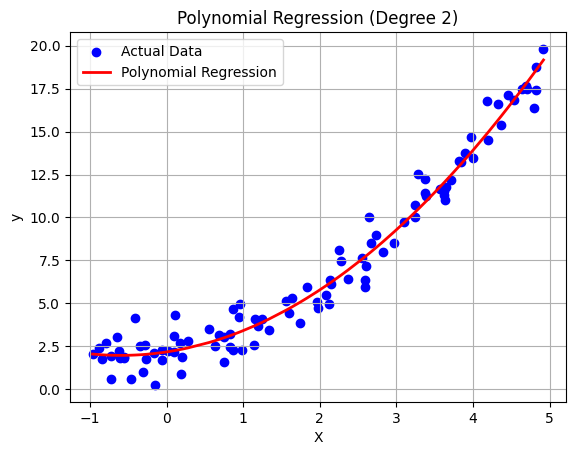

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Generate non-linear data
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 1
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

print("X shape:", X.shape)

# Polynomial feature transformation (degree 2)
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

# Apply Linear Regression on polynomial features
poly_reg_model = LinearRegression()
poly_reg_model.fit(X_poly, y)
y_pred = poly_reg_model.predict(X_poly)

# Plot
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(np.sort(X, axis=0),
         poly_reg_model.predict(poly_features.transform(np.sort(X, axis=0))),
         color='red', linewidth=2, label='Polynomial Regression')
plt.title("Polynomial Regression (Degree 2)")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

#Let take a simple example to understand about tree based modeling--> Decision Tree  

In [36]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from math import sqrt

# Load dataset
df = pd.read_csv("day_2021_to_2024.csv")

# Drop non-essential columns
df = df.drop(['instant', 'dteday', 'casual', 'registered'], axis=1)

# Split into features and target
X = df.drop('cnt', axis=1)
y = df['cnt']

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train Decision Tree Regressor
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = sqrt(mean_squared_error(y_test, y_pred))

# Print results
print("Decision Tree Regression Evaluation:")
print(f"R² Score: {r2:.4f}")
print(f"MAE     : {mae:.2f}")
print(f"RMSE    : {rmse:.2f}")

Decision Tree Regression Evaluation:
R² Score: 1.0000
MAE     : 0.00
RMSE    : 0.00


#Random forest

RMSE: 58.15
R² Score: 1.00


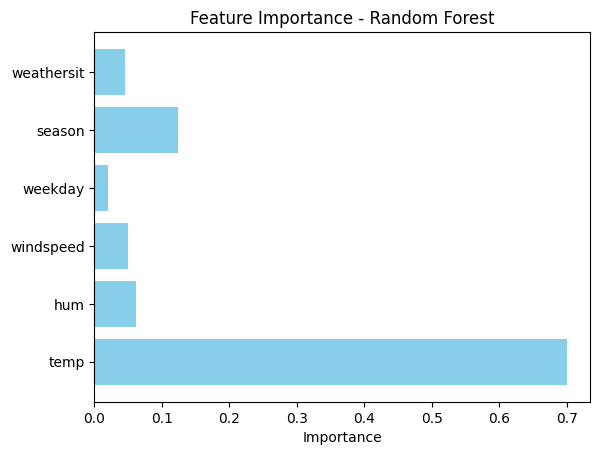

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


# 2. Select features and target
features = ['temp', 'hum', 'windspeed', 'weekday', 'season', 'weathersit']
X = data[features]
y = data['cnt']  # target: total bike rentals

# 3. Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Train Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# 5. Predict
y_pred = rf.predict(X_test)

# 6. Evaluate
# Calculate MSE first, then take the square root for RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

# 7. Feature importance
importances = rf.feature_importances_
plt.barh(features, importances, color='skyblue')
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance")
plt.show()

#K-Means Clustering --> select k random points from data as a centroids . Assign each point to the nearest cluster centroid.calucate the centroid of newly formed cluster  

total no.of points:
2000
one point:
[3.44167e-01 9.85000e+02]


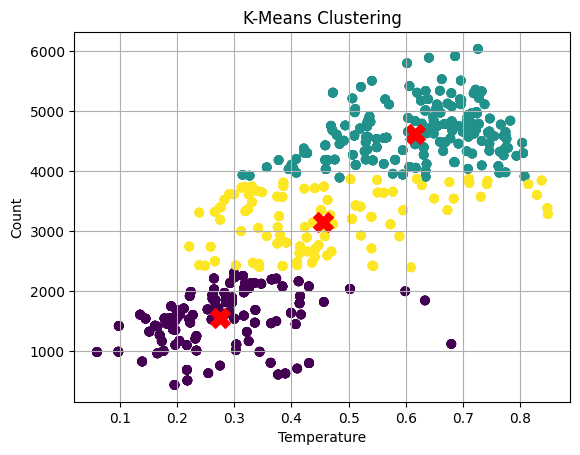

In [38]:
# Import the libraries
from sklearn.cluster import KMeans

# Select two features for clustering
X = df[['temp', 'cnt']].values

#print total number of points
print("total no.of points:")
print(len(X))

# Check one point
print("one point:")
print(X[0])

# Apply KMeans clustering (let's choose 3 clusters)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# Plot with cluster centers
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='red', marker='X', s=200)
plt.title("K-Means Clustering")
plt.xlabel("Temperature")
plt.ylabel("Count")
plt.grid(True)
plt.show()

#Hierarchial Clustering --> it is unsupervised cluserting that groups similar object into the cluster,Where each point is cluster. intially draw a line cutting through the tallest vartical line

no.of points:
2000
one point:
[3.44167e-01 9.85000e+02]


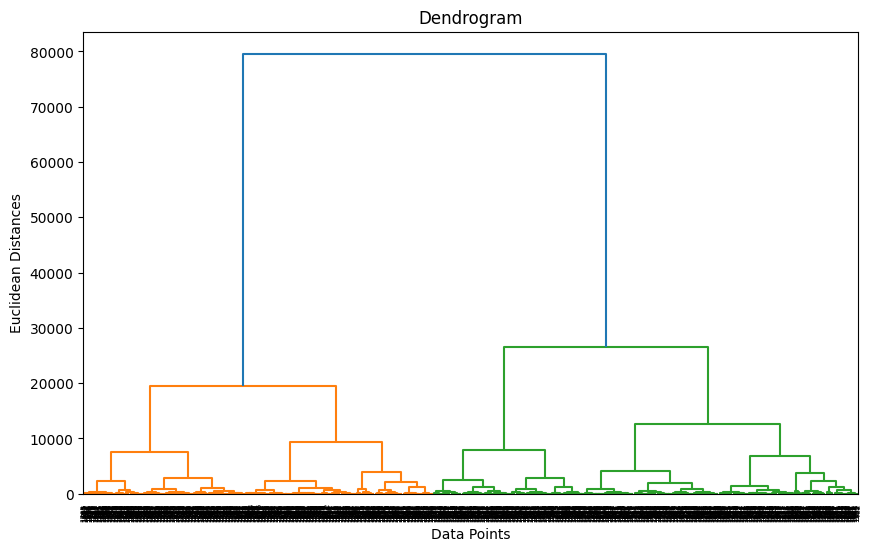

In [39]:
# Import the libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

# Select features for clustering
X = df[['temp', 'cnt']].values

# Print number of points
print("no.of points:")
print(len(X))

# Print one point
print("one point:")
print(X[0])

# Step 1: Dendrogram to choose number of clusters
plt.figure(figsize=(10, 6))
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title("Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distances")
plt.show()

# Step 2: Fit the Agglomerative Clustering model
# Replace 'affinity' with 'metric' as 'affinity' is deprecated
hc = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
y_hc = hc.fit_predict(X)

In [40]:
import joblib

# Save MinMaxScaler
joblib.dump(minmax_scaler, "minmax_scaler.pkl")

# Save StandardScaler
joblib.dump(standard_scaler, "standard_scaler.pkl")

# Save GridSearchCV object (contains the best model + full search)
joblib.dump(grid_search, "grid_search_rf.pkl")

# Optionally save the best estimator separately (just the best RF model)
joblib.dump(grid_search.best_estimator_, "best_rf_model.pkl")


['best_rf_model.pkl']